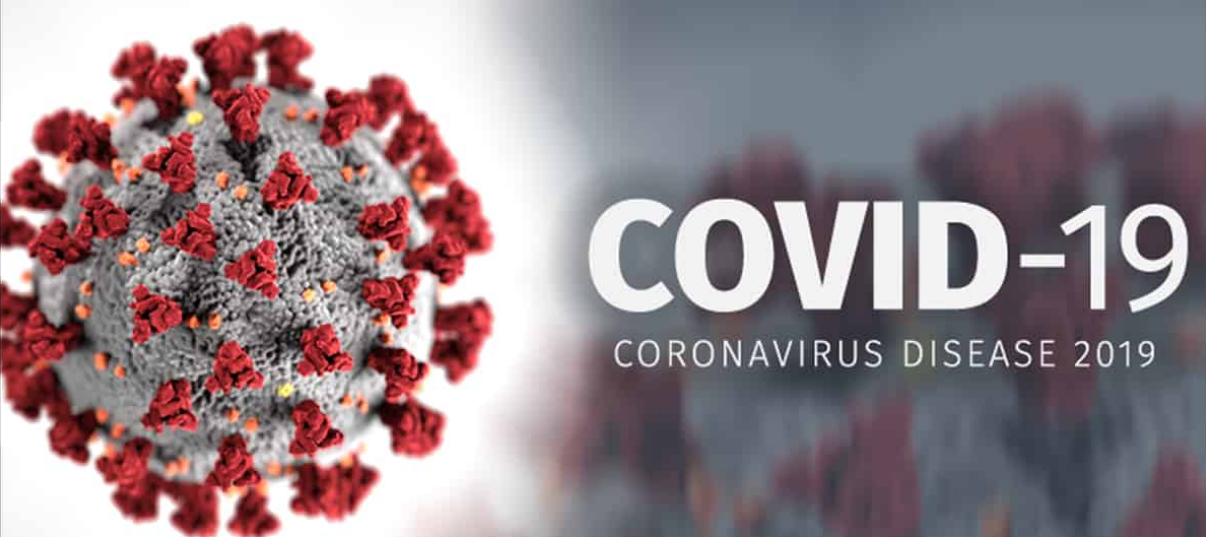

## <b>DATA Collection

This data-set https://www.gob.mx/salud/documentos/datos-abiertos-152127 which was released by the Mexican government. This data-set contains a huge number of anonymised patient-related information.



* <font color = blue> Data Dictionary:

    * <font color = blue> id: <font color = red>The identification number of the patient.
    * <font color = blue> sex: <font color = red>Identify gender of the patient, 1 as female and 2 as male.
    * <font color = blue> patient_type: <font color = red>Type of patient, 1 for not hospitalized and 2 for hosptalized.
    * <font color = blue> entry_date: <font color = red>The date that the patient went to the hospital.
    * <font color = blue> date_symptoms: <font color = red>The date that the patient started to show symptoms.
    * <font color = blue> date_died: <font color = red>The date that the patient died, “9999-99-99” stands for recoveblue.
    * <font color = blue> intubed: <font color = red>Intubation is a procedure that’s used when you can’t breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). “1” denotes that the patient used ventilator and “2” denotes that the patient did not, “97” “98” “99” means not specified.
    * <font color = blue> pneumonia: <font color = red>Indicates whether the patient already have air sacs inflammation or not “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> age: <font color = red>Specifies the age of the patient.
    * <font color = blue> pregnancy: <font color = red>Indicates whether the patient is pregnant or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> diabetes: <font color = red>Indicates whether the patient has diabetes or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> copd: <font color = red>Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> asthma: <font color = red>Indiactes whether the patient has asthma or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> inmsupr: <font color = red>Indicates whether the patient is immunosuppressed or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> hypertension: <font color = red>Indicates whether the patient has hypertension or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> other_disease: <font color = red>Indicates whether the patient has other disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> cardiovascular: <font color = red>Indicates whether if the patient has heart or blood vessels realted disease, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> obesity: <font color = red>Indicates whether the patient is obese or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> renal_chronic: <font color = red>Indicates whether the patient has chronic renal disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> tobacco: <font color = red>Indicates whether if the patient is a tobacco user, “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> contact_other_covid: <font color = red>Indicates whether if the patient has contacted another covid19 patient.
    * <font color = blue> icu: <font color = red>Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), “1” for yes, “2” for no, “97” “98” “99” means not specified.
    * <font color = blue> covid_res: <font color = red>1 indicates person is covid +ve,2 indicates person is covide -ve,3 indicates result is in awaiting process  
    </font color>

In [89]:
# importing libraries for doing operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [90]:
df=pd.read_csv("covid.csv")

In [91]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [92]:
# display info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [93]:
df.describe()


,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


To start cleaning, we must take a look at the values closely, here in the dataset. Most values which are not valid (otherwise coded as N/A are mentioned as 97,98,99 or 9999-99-99 in date format. We need to clean these.

Also most binary variable are mentioned as 1/2 - which were determined from the original source to mean:

(a) Sex
1: Female
2: Male

(b) Patient_type
1: Outpatient
2: Inpatient

(c) Columns with details like pregnancy, diabetes, copd, asthma, etc.
1: Yes
2: No
Others (97,98,99) : Not available

(d) Date of Death (not all die)
9999-99-99 : Indicates that the patient has not died

(e) covid_res 
Named as Test Result:
1: Positive
2: Negative

## CLEANING

In [94]:
def clean_data(df):
    date_cols=['entry_date','date_symptoms']#we are not converting date_died column to date time type
    for col in date_cols:
        df[col]=pd.to_datetime(df[col],infer_datetime_format=True)
    df['date_died'].replace("9999-99-99","alive",inplace=True)
    
    for col in df.columns[:4]:
        df[col].replace([97,98,99],np.nan,inplace=True)
    for col in df.columns[5:]:
        df[col].replace([97,98,99],np.nan,inplace=True)
    df['sex'].replace([1,2],['female','male'],inplace=True)
    df['patient_type'].replace([1,2],['outpatient','inpatient'],inplace=True)
    for col in df.columns[6:8]:
        df[col].replace([1,2],['yes','no'],inplace=True)
    for col in df.columns[9:21]:
        df[col].replace([1,2],['yes','no'],inplace=True)
    df['covid_res'].replace([1,2,3],['positive','negative','awaiting results'],inplace=True)
    df['icu'].replace([1,2],['yes','no'],inplace=True)
    return df

In [95]:
df=clean_data(df)

In [96]:
df.loc[df['date_died']!="alive", 'date_died'] ="dead"

In [97]:
df.rename(columns={'covid_res':'Chance'},inplace=True)

In [98]:
df.loc[df['sex']=="male", 'pregnancy'] ="no"

In [99]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Chance,icu
0,16169f,male,outpatient,2020-04-05,2020-02-05,alive,NaN,no,27.0,no,...,no,no,no,no,no,no,no,no,positive,NaN
1,1009bf,male,outpatient,2020-03-19,2020-03-17,alive,NaN,no,24.0,no,...,no,no,no,no,no,no,no,NaN,positive,NaN
2,167386,female,inpatient,2020-06-04,2020-01-04,alive,no,no,54.0,no,...,no,no,no,no,yes,no,no,NaN,positive,no
3,0b5948,male,inpatient,2020-04-17,2020-10-04,alive,no,yes,30.0,no,...,no,no,no,no,no,no,no,NaN,positive,no
4,0d01b5,female,inpatient,2020-04-13,2020-04-13,dead,no,no,60.0,no,...,no,yes,no,yes,no,no,no,NaN,positive,no


Text(0.5, 1.0, 'Null value heatmap')

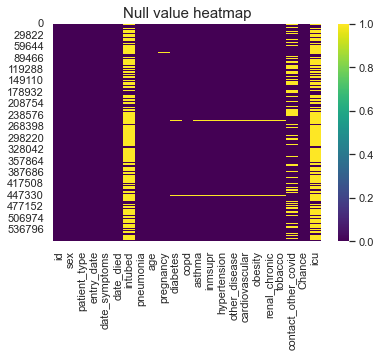

In [100]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=15)

# as we can see there are many null values in intubed,pregnancy,contact_other_covid and icu

In [101]:
df.drop(columns = ['intubed', 'icu', 'contact_other_covid', 'entry_date', 'date_symptoms',], inplace=True)

In [102]:
df.head()

,id,sex,patient_type,date_died,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,Chance
0,16169f,male,outpatient,alive,no,27.0,no,no,no,no,no,no,no,no,no,no,no,positive
1,1009bf,male,outpatient,alive,no,24.0,no,no,no,no,no,no,no,no,no,no,no,positive
2,167386,female,inpatient,alive,no,54.0,no,no,no,no,no,no,no,no,yes,no,no,positive
3,0b5948,male,inpatient,alive,yes,30.0,no,no,no,no,no,no,no,no,no,no,no,positive
4,0d01b5,female,inpatient,dead,no,60.0,no,yes,no,no,no,yes,no,yes,no,no,no,positive


Text(0.5, 1.0, 'Null value heatmap')

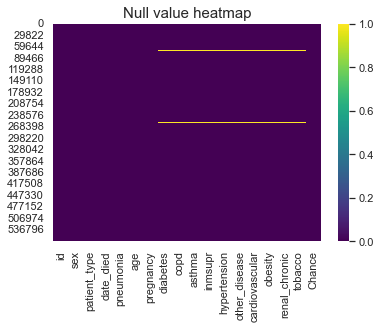

In [103]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=15)

In [104]:
df.isnull().sum()

id                   0
sex                  0
patient_type         0
date_died            0
pneumonia           11
age                207
pregnancy         1587
diabetes          1981
copd              1749
asthma            1752
inmsupr           1980
hypertension      1824
other_disease     2598
cardiovascular    1822
obesity           1781
renal_chronic     1792
tobacco           1907
Chance               0
dtype: int64

In [105]:
df.shape

(566602, 18)

In [106]:
df = df.dropna(subset=['age','pneumonia','cardiovascular','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_disease','obesity','renal_chronic','tobacco'])

In [107]:
df.shape

(561016, 18)

In [108]:
df.isnull().sum()

id                0
sex               0
patient_type      0
date_died         0
pneumonia         0
age               0
pregnancy         0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
Chance            0
dtype: int64

Text(0.5, 1.0, 'Null value heatmap')

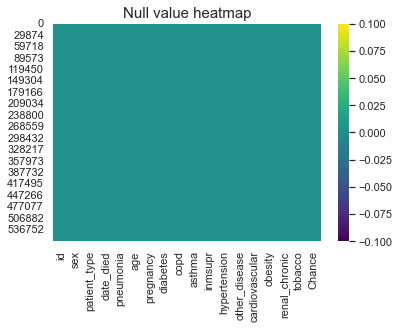

In [109]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=15)

Text(0.5, 1.0, 'Checking Outliers in age')

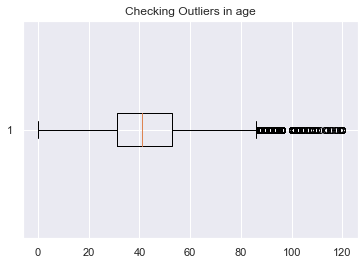

In [110]:
# Outliers in age
plt.boxplot(df["age"],vert=False)
plt.title('Checking Outliers in age')

In [111]:
# We are having outliers and need to work on it uding IQR

Q1 = np.percentile(df['age'],25, interpolation ='midpoint')
Q2 = np.percentile(df['age'],50, interpolation = 'midpoint')
Q3 = np.percentile(df['age'],75, interpolation = 'midpoint')

#Findding IQR ,Upper & lower limit

IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR
print("IQR is " , IQR)
print("Lower limit is " , lower_limit)
print("Upper limit is" , upper_limit)

IQR is  22.0
Lower limit is  -2.0
Upper limit is 86.0


In [112]:
age_outlier = []

for x in df["age"]:
  if ((x > upper_limit) or (x < 1)):
    age_outlier.append(x)
print("Fare outlier are " , age_outlier)



Fare outlier are  [87.0, 89.0, 0.0, 87.0, 88.0, 0.0, 87.0, 92.0, 90.0, 87.0, 87.0, 87.0, 95.0, 0.0, 89.0, 87.0, 90.0, 95.0, 88.0, 88.0, 0.0, 87.0, 0.0, 89.0, 0.0, 0.0, 0.0, 92.0, 89.0, 93.0, 90.0, 95.0, 0.0, 88.0, 87.0, 88.0, 93.0, 88.0, 0.0, 87.0, 0.0, 87.0, 93.0, 88.0, 89.0, 0.0, 88.0, 95.0, 0.0, 89.0, 87.0, 90.0, 91.0, 0.0, 87.0, 91.0, 89.0, 88.0, 87.0, 87.0, 93.0, 0.0, 93.0, 89.0, 87.0, 92.0, 90.0, 93.0, 92.0, 0.0, 0.0, 87.0, 87.0, 90.0, 0.0, 88.0, 96.0, 89.0, 91.0, 88.0, 90.0, 87.0, 0.0, 89.0, 88.0, 88.0, 94.0, 90.0, 87.0, 88.0, 93.0, 87.0, 100.0, 0.0, 87.0, 91.0, 0.0, 96.0, 0.0, 91.0, 0.0, 88.0, 93.0, 88.0, 90.0, 0.0, 87.0, 0.0, 90.0, 94.0, 88.0, 0.0, 0.0, 88.0, 92.0, 87.0, 87.0, 94.0, 91.0, 0.0, 90.0, 0.0, 92.0, 90.0, 0.0, 119.0, 88.0, 92.0, 88.0, 87.0, 90.0, 89.0, 90.0, 0.0, 88.0, 92.0, 87.0, 89.0, 87.0, 0.0, 0.0, 92.0, 89.0, 94.0, 88.0, 94.0, 88.0, 89.0, 91.0, 89.0, 95.0, 88.0, 87.0, 0.0, 88.0, 0.0, 90.0, 92.0, 0.0, 0.0, 0.0, 94.0, 88.0, 88.0, 87.0, 89.0, 0.0, 89.0, 88.0, 94.0

In [113]:
index_outlier_low = df["age"] < 1
df.drop(df.loc[index_outlier_low].index , inplace = True)

In [114]:
index_outlier_up = df["age"] > upper_limit
df.drop(df.loc[index_outlier_up].index , inplace = True)

Text(0.5, 1.0, 'Checking Outliers in age')

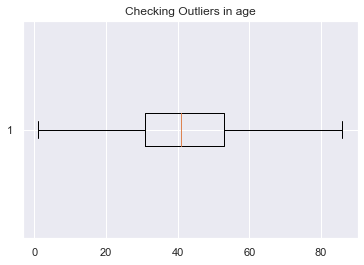

In [115]:
# Outliers in age
plt.boxplot(df["age"],vert=False)
plt.title('Checking Outliers in age')

Age outliers are cleared

In [116]:
df.head()

,id,sex,patient_type,date_died,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,Chance
0,16169f,male,outpatient,alive,no,27.0,no,no,no,no,no,no,no,no,no,no,no,positive
1,1009bf,male,outpatient,alive,no,24.0,no,no,no,no,no,no,no,no,no,no,no,positive
2,167386,female,inpatient,alive,no,54.0,no,no,no,no,no,no,no,no,yes,no,no,positive
3,0b5948,male,inpatient,alive,yes,30.0,no,no,no,no,no,no,no,no,no,no,no,positive
4,0d01b5,female,inpatient,dead,no,60.0,no,yes,no,no,no,yes,no,yes,no,no,no,positive


In [117]:
df=df.drop(['id'], axis = 1)

In [118]:
df.head()

,sex,patient_type,date_died,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,Chance
0,male,outpatient,alive,no,27.0,no,no,no,no,no,no,no,no,no,no,no,positive
1,male,outpatient,alive,no,24.0,no,no,no,no,no,no,no,no,no,no,no,positive
2,female,inpatient,alive,no,54.0,no,no,no,no,no,no,no,no,yes,no,no,positive
3,male,inpatient,alive,yes,30.0,no,no,no,no,no,no,no,no,no,no,no,positive
4,female,inpatient,dead,no,60.0,no,yes,no,no,no,yes,no,yes,no,no,no,positive


## Data Visualization

<AxesSubplot:xlabel='age', ylabel='Density'>

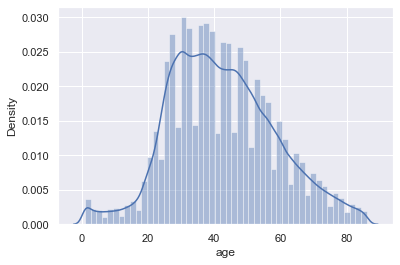

In [119]:
sns.distplot(df['age'])

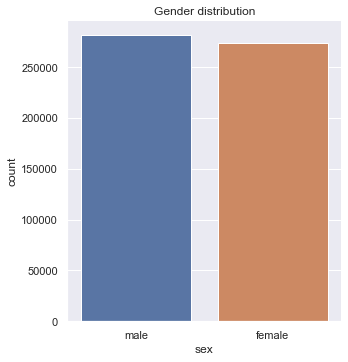

In [120]:
sns.catplot('sex',data=df,kind='count')
plt.title('Gender distribution')
plt.show()



As we can see from the plot above, the data is quite balanced in terms of gender. This is exremely desirable when we are analysing data as it removes bias.

Let us now check how many of each gender are positive.


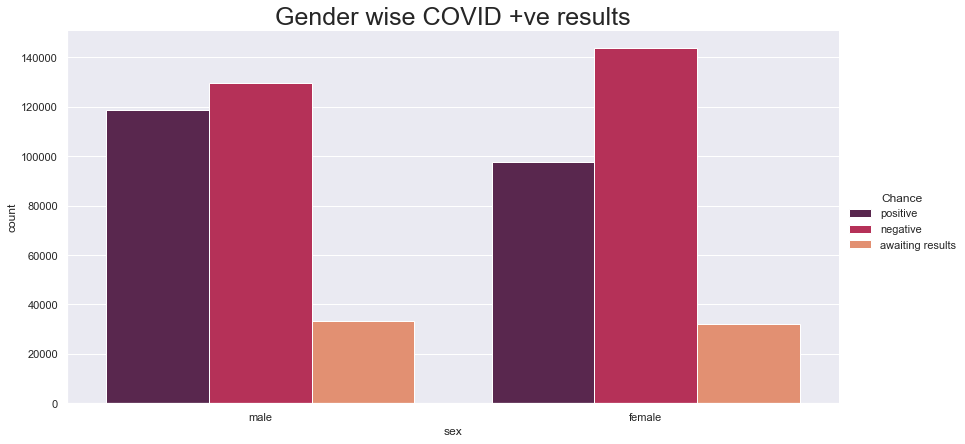

In [121]:
sns.catplot('sex',data=df,hue='Chance',kind='count',palette='rocket',aspect=2,height=6)
plt.title('Gender wise COVID +ve results',size=25)
plt.show()

In [122]:
def age_band(age):
    
   
    if age<2:
        return 'Less than 2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

Text(0.5, 1.0, 'Gender wise age distribution')

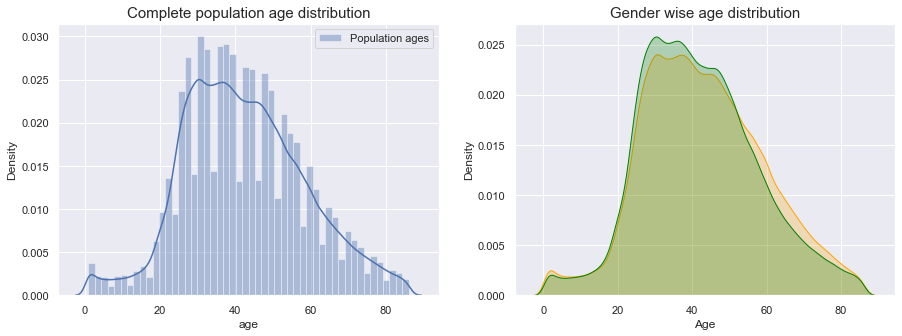

In [123]:
sns.set()
fig1=plt.figure(figsize=(15,5))
ax1=fig1.add_subplot(121)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(122)

df1_m=df[df['sex']=='male']
df1_f=df[df['sex']=='female']

b=sns.kdeplot(df1_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df1_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)

From the above left graph, we can see that we have a bimodal graph with high distribution from 20-60 years. There is also a peak in the lower section of the graph meaning we have high number of infants in our distribution

In [124]:
df['Age band']=df['age'].apply(age_band)
df['Count']=1

In [125]:
df_age_band=df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '30-40'),
  Text(1, 0, '40-50'),
  Text(2, 0, '20-30'),
  Text(3, 0, '50-60'),
  Text(4, 0, '60-80'),
  Text(5, 0, '10-20'),
  Text(6, 0, '2-10'),
  Text(7, 0, 'Above 80'),
  Text(8, 0, 'Less than 2')])

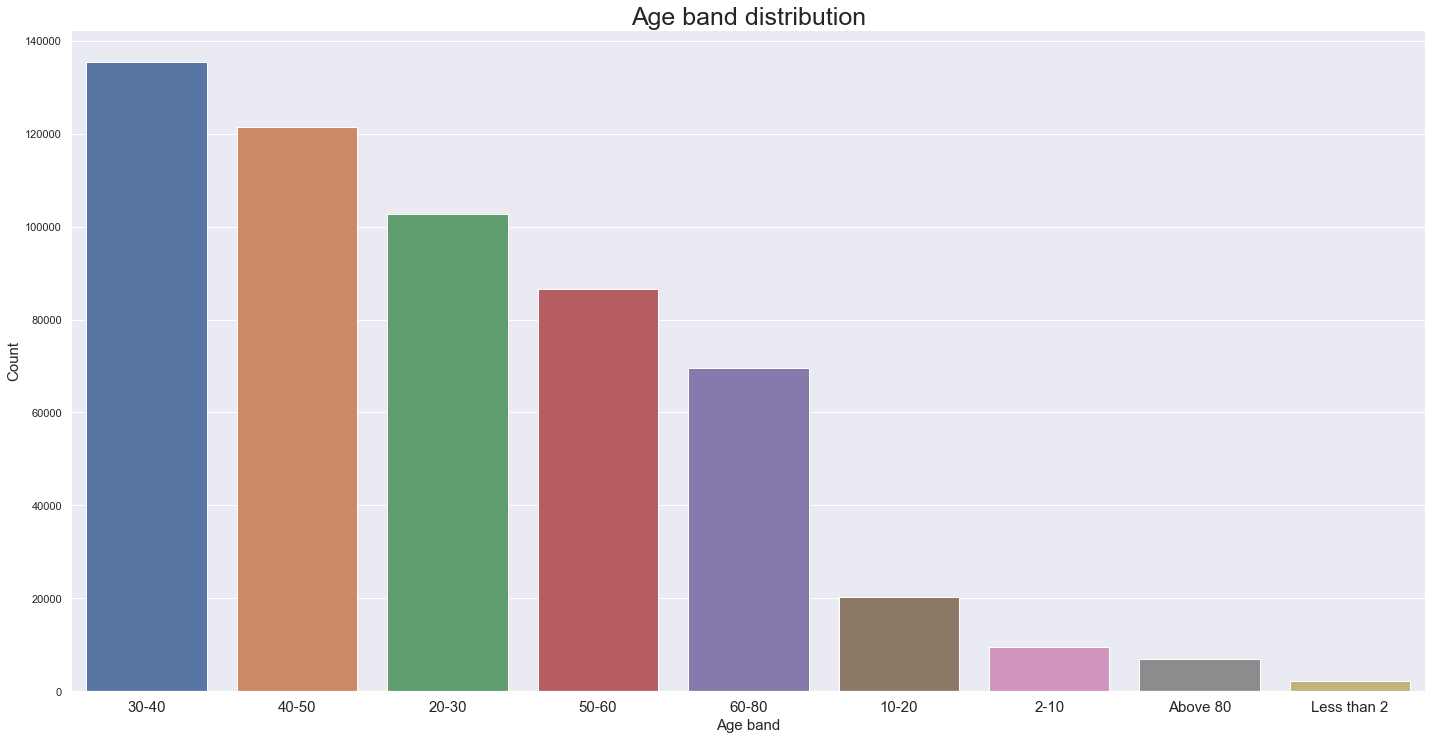

In [126]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)


plt.title('Age band distribution',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)



From the above plot, we see that 30-40 aged people are maximum followed by 40-50 and then, 20-30.

Let us now check how the fatalities change with respect to each age band.


Text(0.5, 1.0, 'COVID +ve case fatality with respect to age groups')

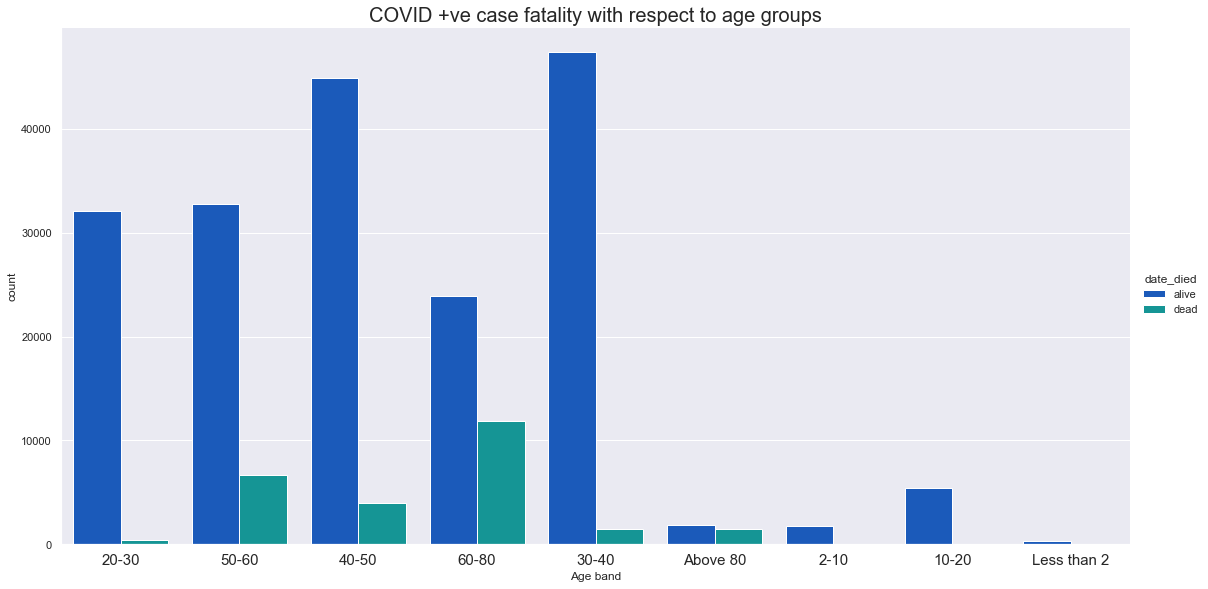

In [127]:
df_pos=df[df['Chance']=='positive']
sns.catplot('Age band',kind='count',hue='date_died',data=df_pos,height=8,aspect=2,palette='winter')

plt.xticks(size=15)

plt.title('COVID +ve case fatality with respect to age groups',size=20)

From the above plot, it can be seen that the case fatality is quite high for ages of 60-80 and above 80. This is expected since with body, the immune system becomes weaker and hence, it becomes tough for the body to fight a completely new virus. This is not just true for COVID but for most diseases.

Text(0.5, 1.0, 'Obesity + COVID')

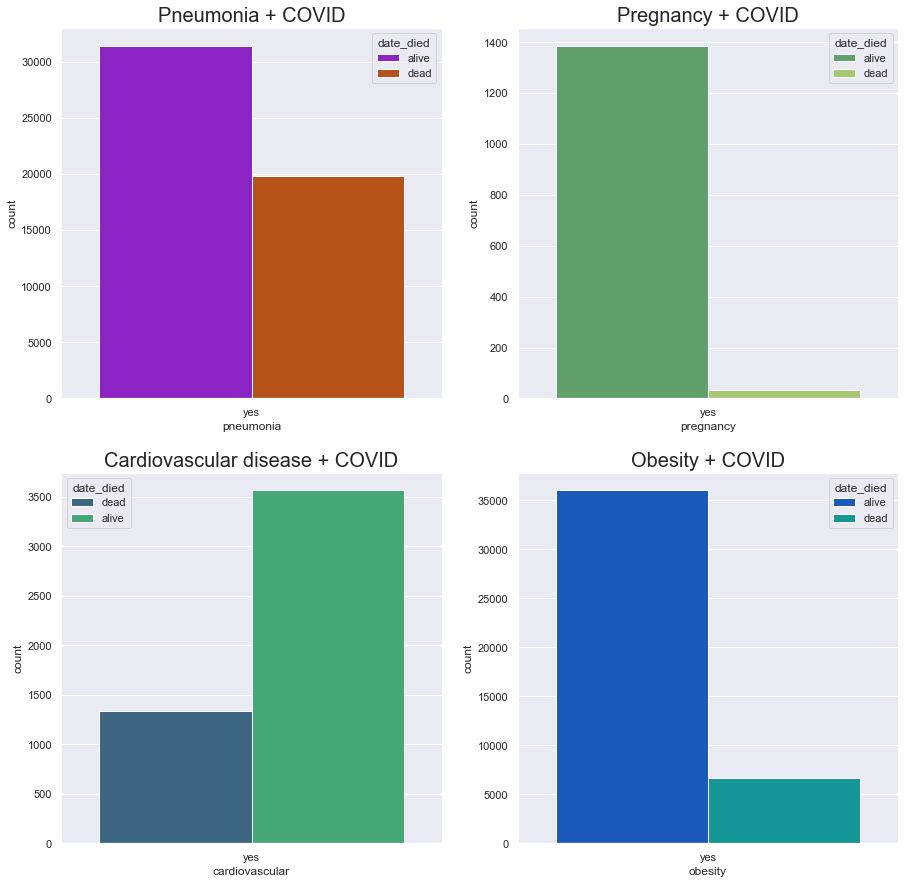

In [128]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='yes']
df_preg=df_pos[df_pos['pregnancy']=='yes']
df_card=df_pos[df_pos['cardiovascular']=='yes']
df_obes=df_pos[df_pos['obesity']=='yes']

sns.countplot('pneumonia',data=df_pneu,hue='date_died',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='date_died',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='date_died',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='date_died',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)



From the above graphs, we can see that patients with pneumonia and COVID-19 had the highest mortality rate followed by cardiovascular diseases.